# Made by Muhammad Dava Pasha (mdavap) @ Dicoding

## Import required library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import keras
from keras import layers
from keras import ops

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing 

## Import the dataset

In [2]:
data = pd.read_csv('./food_order.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Data Information included
- 1898 Entries.
- order_id and customer_id is non null and the type int64.
- restaurant_name and cuisine_type is non null and the type is object or string.
- cost_of_the_order is non null and the type is float64.
- day_of_the_week is non null and the type is object or string.
- rating is non null and the type is object.
- food_preparation_time and delivery_time is non null and the type is int64.

## Data Preparation

In [4]:
print(f'Total duplicated: {data.duplicated().sum()}')

Total duplicated: 0


### No duplicated data found.

In [5]:
print('Total null: ')
data.isna().sum()

Total null: 


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### No null or no value in this data.

### Replace `Not given rating` to 0

In [6]:
data.rating = data.rating.apply(lambda x: 0 if x == 'Not given' else x)

In [7]:
data.rating

0       0
1       0
2       5
3       3
4       4
       ..
1893    5
1894    5
1895    0
1896    5
1897    0
Name: rating, Length: 1898, dtype: object

### All `Not given` rating has been changed to 0

In [8]:
list_customerid = data.customer_id.unique().tolist()

In [9]:
data.rating = data.rating.values.astype(np.float32)

## Exploratory

In [10]:
customer_length = data.customer_id.nunique()
print(f'Total customer: {customer_length}')

Total customer: 1200


### Total customer we have is 1200.

In [11]:
total_ratings = data.rating.shape[0]
print(f'Total ratings: {total_ratings}')

Total ratings: 1898


### Total rating we have is 1898.

In [12]:
total_cuisine = data.cuisine_type.nunique()
print(f'Total cuisine type: {total_cuisine}')

Total cuisine type: 14


### Total cuisine type we have is 14.

In [13]:
total_restaurants = data.restaurant_name.nunique()
print(f'Total restaurants: {total_restaurants}')

Total restaurants: 178


### Total restaurants we have is 178.

In [14]:
cuisine_data = data.cuisine_type.value_counts()

c:\Users\Co\.conda\envs\sbmpd\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Co\.conda\envs\sbmpd\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Co\.conda\envs\sbmpd\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Co\.conda\envs\sbmpd\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


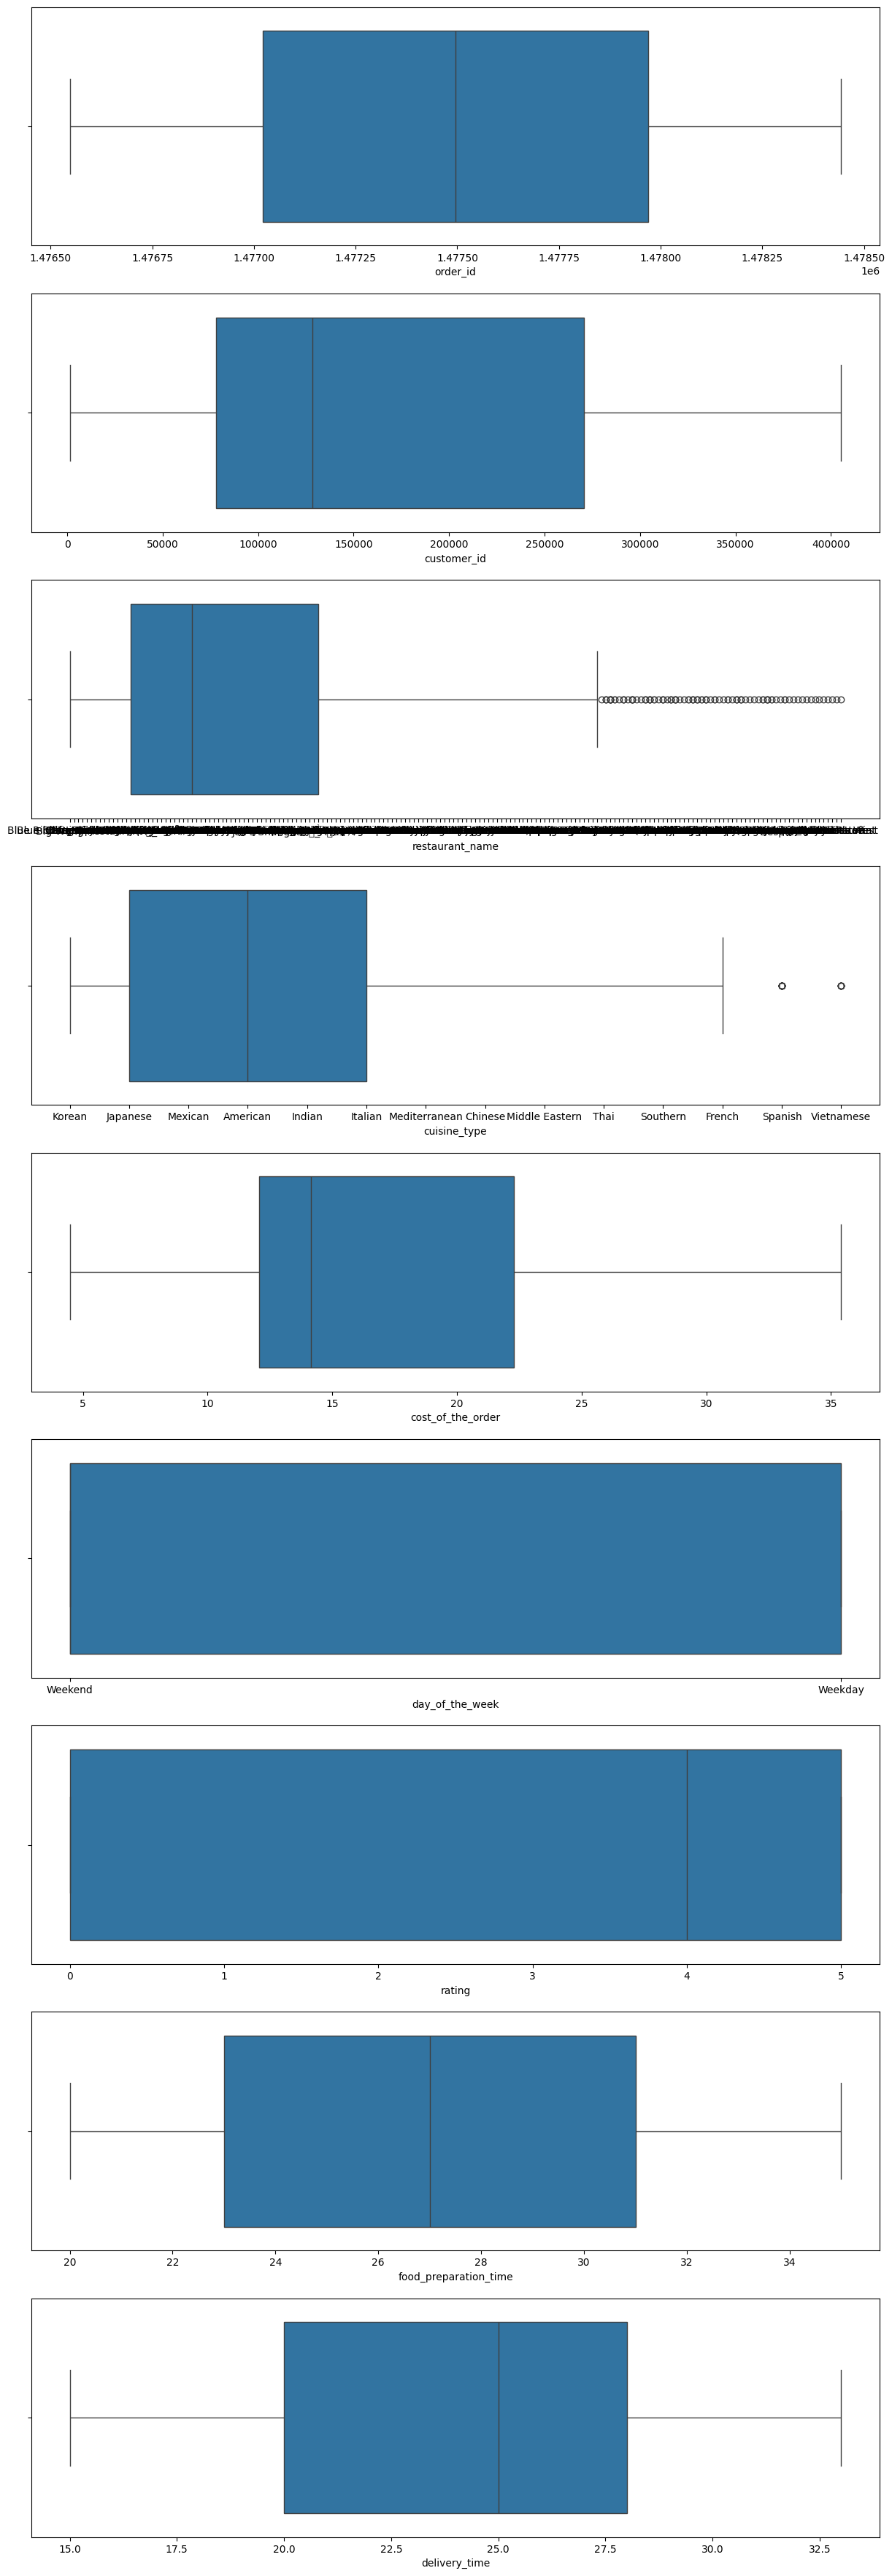

In [15]:
columns = data.columns.values
columns_size = columns.size
fig, ax = plt.subplots(columns_size, 1, figsize=(15, 45)) 
for i in range(columns_size):
    sns.boxplot(x=columns[i], data=data, ax=ax[i])

### No outlier on this dataset.

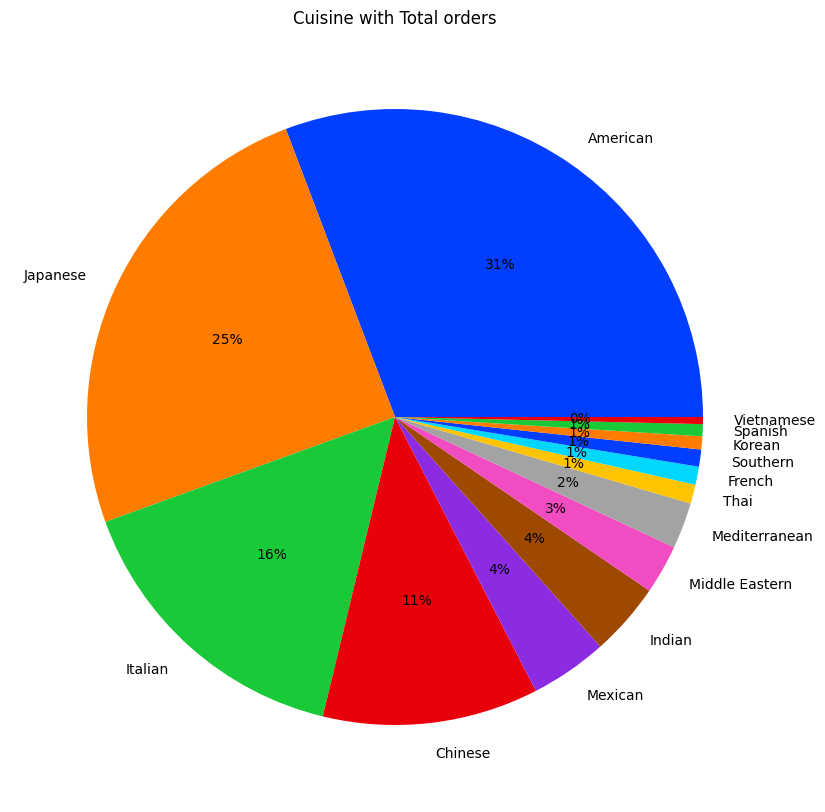

In [16]:
palette_color = sns.color_palette('bright') 
plt.figure(figsize=(10,10))
plt.title('Cuisine with Total orders')
plt.pie(cuisine_data.values, labels=cuisine_data.index, colors=palette_color, autopct='%.0f%%') 
plt.show() 

### As we can see from the chart above, people primarily order American, Japanese, and Italian food.

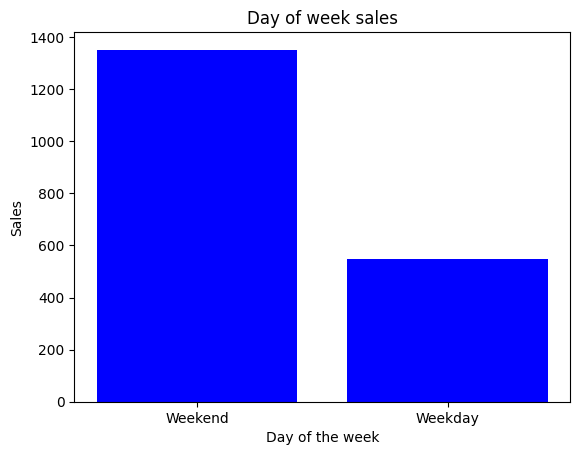

In [18]:
total_day = data.day_of_the_week.value_counts()
plt.bar(total_day.index, total_day.values, color='blue')
plt.title('Day of week sales')
plt.xlabel('Day of the week')
plt.ylabel('Sales')
plt.show()

### As we can see from the chart above, most people order on weekends.

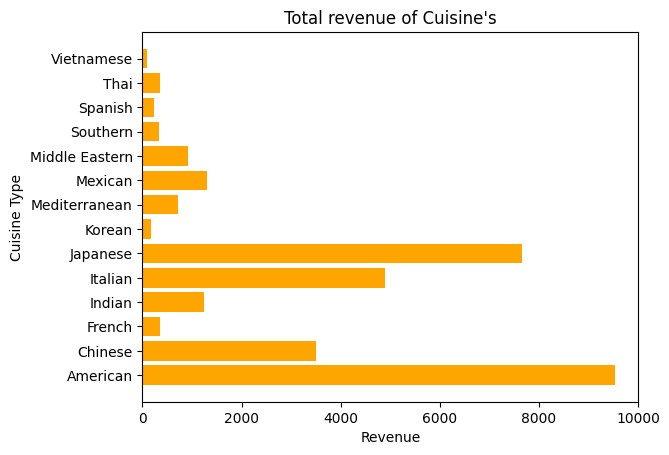

In [19]:
cost_by_cuisine = data.groupby('cuisine_type')['cost_of_the_order'].aggregate(['sum'])
plt.barh(cost_by_cuisine.index, cost_by_cuisine['sum'].values, color='orange')
plt.title('Total revenue of Cuisine\'s')
plt.xlabel('Revenue')
plt.ylabel('Cuisine Type')
plt.show()

### Restaurant Sales by Cuisine Type
1. American cuisine leads significantly with **$9,530.78**
2. Japanese follows as a strong second with **$7,663.13**
3. Italian ranks third with **$4,892.77**
4. Chinese holds fourth position with **$3,505.62**

The middle tier includes:
- Indian: **$1,235.14**
- Mexican: **$1,303.85**
- Middle Eastern: **$922.21**
- Mediterranean: **$711.84**

The lower tier consists of:
- Thai: **$364.95**
- French: **$356.29**
- Southern: **$328.11**
- Spanish: **$227.93**
- Korean: **$182.02**
- Vietnamese: **$90.18**

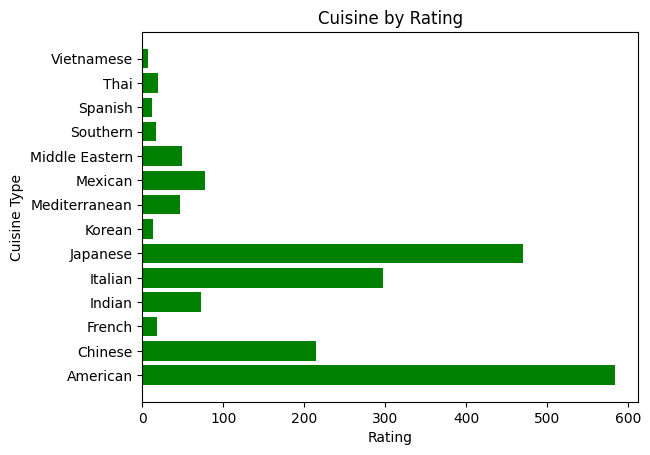

In [20]:
cuisine_by_rating = data.groupby('cuisine_type')['rating'].aggregate(['count'])
plt.barh(cuisine_by_rating.index, cuisine_by_rating['count'].values, color='green')
plt.title('Cuisine by Rating')
plt.xlabel('Rating')
plt.ylabel('Cuisine Type')
plt.show()

### Analysis of Restaurant Count by Cuisine Type
1. American dominates with **584 locations**, representing the largest presence
2. Japanese follows with **470 locations**
3. Italian has **298 locations**
4. Chinese rounds out the top 4 with **215 locations**

The middle tier consists of:
- Mexican: **77 locations**
- Indian: **73 locations**
- Middle Eastern: **49 locations**
- Mediterranean: **46 locations**

The lower tier includes:
- Thai: **19 locations**
- French: **18 locations**
- Southern: **17 locations**
- Korean: **13 locations**
- Spanish: **12 locations**
- Vietnamese: **7 locations**

## Recommendation System

In [21]:
restaurant_with_rating = data.groupby('restaurant_name')['rating'].size().sort_values(ascending=False).reset_index()

### Content Based Filtering

In [ ]:
tfvec = TfidfVectorizer()
tfvec.fit(data.cuisine_type) 

In [23]:
tfmatrix = tfvec.fit_transform(data.cuisine_type) 

In [24]:
csim = cosine_similarity(tfmatrix) 

In [25]:
restaurant_name = data.restaurant_name
data_sim_cosine = pd.DataFrame(csim, index=restaurant_name, columns=restaurant_name)
data_sim_cosine

restaurant_name,Hangawi,Blue Ribbon Sushi Izakaya,Cafe Habana,Blue Ribbon Fried Chicken,Dirty Bird to Go,Tamarind TriBeCa,The Meatball Shop,Barbounia,Anjappar Chettinad,Bukhara Grill,...,The Meatball Shop,RedFarm Broadway,TAO,Shake Shack,Han Dynasty,Chipotle Mexican Grill $1.99 Delivery,The Smile,Blue Ribbon Sushi,Jack's Wife Freda,Blue Ribbon Sushi
restaurant_name,,,,,,,,,,,,,,,,,,,,,
Hangawi,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Blue Ribbon Sushi Izakaya,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
Cafe Habana,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Blue Ribbon Fried Chicken,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Dirty Bird to Go,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chipotle Mexican Grill $1.99 Delivery,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
The Smile,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Blue Ribbon Sushi,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### The vector from cosine similarity

In [26]:
def get_resto_recommendation(name, n):
    index = np.where(data_sim_cosine.index == name)[0][1]
    possible_closest = list(enumerate(csim[index]))

    sorted_list = sorted(possible_closest, key=lambda x: x[1], reverse=True)
    
    target_recommendation = sorted_list[1: n + 1]
    
    return [data_sim_cosine.iloc[[i[0]]].index.values[0] for i in target_recommendation if i[0] != index]

In [40]:
list_restaurant = data.restaurant_name.values.tolist()
k = 3
for i in range(5):
    restaurant_like = np.random.choice(list_restaurant)
    
    similar_cuisine_restaurants = data[
        data['cuisine_type'] == data[data['restaurant_name'] == restaurant_like]['cuisine_type'].values[0]
    ]['restaurant_name'].tolist()
    ground_truth = [r for r in similar_cuisine_restaurants if r != restaurant_like][:k]

    recommendations = get_resto_recommendation(restaurant_like, k)

    print(f'----- Simillar restaurant like "{restaurant_like}" ----- ')
    for i in recommendations:
        print(i)

    precision = len(set(recommendations) & set(ground_truth)) / len(recommendations)
    recall = len(set(recommendations) & set(ground_truth)) / len(ground_truth)
    print(f"Precision@{k}: {precision:.2f} Recall@{k}: {recall:.2f}")
    print('-'*40)

----- Simillar restaurant like "Blue Ribbon Fried Chicken" ----- 
Dirty Bird to Go
Lucky's Famous Burgers
Precision@3: 1.00 Recall@3: 0.67
----------------------------------------
----- Simillar restaurant like "Nobu Next Door" ----- 
Sushi of Gari
Blue Ribbon Sushi Izakaya
Blue Ribbon Sushi
Precision@3: 0.67 Recall@3: 0.67
----------------------------------------
----- Simillar restaurant like "Joe's Shanghai _Àü£¾÷´" ----- 
RedFarm Hudson
RedFarm Broadway
RedFarm Broadway
Precision@3: 0.67 Recall@3: 0.67
----------------------------------------
----- Simillar restaurant like "Serafina Fabulous Pizza" ----- 
The Meatball Shop
Otto Enoteca Pizzeria
Vezzo Thin Crust Pizza
Precision@3: 0.67 Recall@3: 0.67
----------------------------------------
----- Simillar restaurant like "Jack's Wife Freda" ----- 
Pylos
Jack's Wife Freda
Mamoun's Falafel
Precision@3: 0.67 Recall@3: 0.67
----------------------------------------


#### The result of Content Based Filtering
1. Blue Ribbon Fried Chicken (Chicken restaurant)
- Suggestions: Dirty Bird To Go, Lucky's Famous Burgers
- Precision@3: 1.00 (very high - suggests the recommendations are relevant)
- Recall@3: 0.67 (indicates it found 67% of all possible relevant matches)
2. Nobu Next Door (Japanese/Sushi restaurant)
- Suggestions: All sushi-related restaurants (Sushi of Gari, Blue Ribbon Sushi locations)
- Both metrics at 0.67 - decent performance
3. Joe's Shanghai (Chinese restaurant)
- Suggestions: RedFarm locations (modern Chinese restaurants)
- 0.67 for both metrics - reasonable performance
4. Serafina Fabulous Pizza (Pizza restaurant)
- Suggestions: Mix of Italian restaurants including pizza places
- 0.67 for both metrics
5. Jack's Wife Freda (Mediterranean/American restaurant)
- Suggestions: Mix including Mediterranean food (Mamoun's Falafel)
- 0.67 for both metrics

### Collaborative Filtering

### Encoding

In [28]:
# Normalization of rating
min_rating = min(data.rating)
max_rating = max(data.rating)

def normalize(rating):
    return (rating - min_rating) / max_rating

encoded_rating = data.rating.apply(normalize).values 

In [29]:
# Encoding of customer id
user_to_id_encoded = {x: i for i, x in enumerate(list_customerid)}
data['customer'] = data['customer_id'].map(user_to_id_encoded)

In [39]:
# Encoding of restaurant id
list_restaurant = data['restaurant_name']
resto_to_id_encoded = {x: i for i, x in enumerate(list_restaurant)}
id_to_resto = {i: x for i, x in enumerate(list_restaurant)}
    
data['restaurant_id'] = data['restaurant_name'].map(resto_to_id_encoded)

#### Split dataset for Training and Test

In [32]:
data_random = data.sample(frac=1, random_state=9090)

In [33]:
x = data[['customer', 'resto']].values

y = encoded_rating
size_data = data.shape[0]

# Split 90% train and 10% test
train_indices = int(0.9 * size_data)

x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

#### Modeling

In [ ]:
class RecommendationModel(keras.Model):
    def __init__(self, num_customers, num_restorant, embedding_size = 50, **kwargs):
        super().__init__(**kwargs)
        self.num_customers = num_customers
        self.num_restorant = num_restorant
        self.user_embedding = layers.Embedding(
            num_customers,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_customers, 1)
        self.movie_embedding = layers.Embedding(
            num_restorant,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_restorant, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        resto_vector = self.movie_embedding(inputs[:, 1])
        resto_bias = self.movie_bias(inputs[:, 1])
        dot_user_restaurant = ops.tensordot(user_vector, resto_vector, 2)
        x = dot_user_restaurant + user_bias + resto_bias
        return ops.nn.sigmoid(x)


model = RecommendationModel(customer_length, len(list_restaurant), 50)
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[keras.metrics.RootMeanSquaredError()]
)

In [35]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 10,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6941 - root_mean_squared_error: 0.4383 - val_loss: 0.6962 - val_root_mean_squared_error: 0.4345
Epoch 2/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6890 - root_mean_squared_error: 0.4403 - val_loss: 0.6979 - val_root_mean_squared_error: 0.4354
Epoch 3/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6801 - root_mean_squared_error: 0.4344 - val_loss: 0.6986 - val_root_mean_squared_error: 0.4358
Epoch 4/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6784 - root_mean_squared_error: 0.4347 - val_loss: 0.7000 - val_root_mean_squared_error: 0.4366
Epoch 5/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6688 - root_mean_squared_error: 0.4222 - val_loss: 0.7024 - val_root_mean_squared_error: 0.4380
Epoch 6/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6658 - root_mean_squared_error: 0.4298 - val_loss: 0.7037 - val_root_mean_squared_error: 0.4387
Epoch 7/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

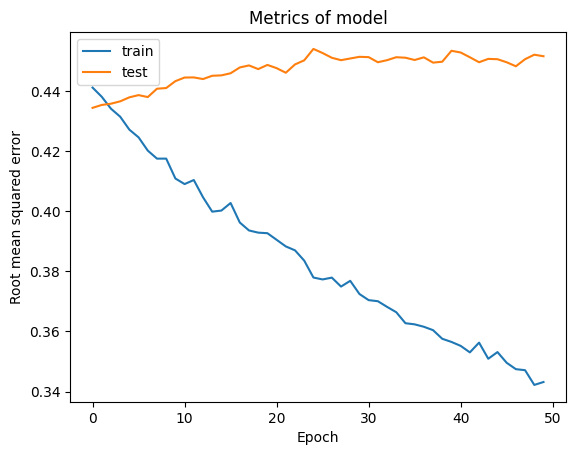

In [36]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Metrics of model')
plt.ylabel('Root mean squared error')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Based on graph above, this model is overfitting because the dataset is really small.

#### Inference 

In [43]:
def get_recomendation_from_customer(customer_id, n):
    resto_visited_customer = set(data[data.customer_id == customer_id].restaurant_id.values)
    resto_not_visited = list(set([id_to_resto[x] for x in id_to_resto if x not in resto_visited_customer]))
    resto_not_visited = [[resto_to_id_encoded.get(x)] for x in resto_not_visited]
    
    
    encoded_customer = user_to_id_encoded.get(customer_id)
    input = np.hstack(
        ([[encoded_customer]] * len(resto_not_visited), resto_not_visited)
    )

    ratings = model.predict(input).flatten()

    top_ratings_indices = ratings.argsort()[-n:][::-1]
    return [id_to_resto.get(resto_not_visited[x][0]) for x in top_ratings_indices]

In [44]:
resto_to_cousine = dict(data.groupby('restaurant_name')['cuisine_type'].value_counts().index.values)

for i in range(5):
    customer_id = data.customer_id.sample(1).iloc[0]
    recommendation = get_recomendation_from_customer(customer_id, 3) # top-n, top-3

    print(f'------Recommendation for customer \'{customer_id}\'------')
    for resto in recommendation:
        print(f'{resto} : {resto_to_cousine[resto]}')
    print('-'*50)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
------Recommendation for customer '41638'------
Dickson's Farmstand Meats : American
Bukhara Grill : Indian
Hummus Place : Middle Eastern
--------------------------------------------------
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
------Recommendation for customer '65806'------
Big Daddy's : American
Klong : Thai
Moonstruck on Second : American
--------------------------------------------------
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
------Recommendation for customer '306119'------
Dickson's Farmstand Meats : American
Hot Kitchen : Chinese
Bukhara Grill : Indian
--------------------------------------------------
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
------Recommendation for customer '87727'------
Hot Kitchen : Chinese
Haru Gramercy Park : Japanese
The MasalaWala : Indian
--------------------------------------------------
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
------Recommendation for customer '222734'------
Dickson's Farmstand Meats : American
Klong : Tha

1. Customer 41638
- Mix of American, Indian, and Middle Eastern cuisines
- Suggests they have diverse taste preferences

2. Customer 65806
- Heavily American-focused (2 American restaurants)
- One Thai restaurant for variety
- Might indicate a preference for American cuisine with occasional Asian food

3. Customer 306119
- American, Chinese, and Indian restaurants
- Balanced mix of Western and Asian cuisines

4. Customer 87727
- All Asian cuisines (Chinese, Japanese, Indian)
- Suggests strong preference for Asian restaurants

5. Customer 222734
- Mix of American, Thai, and Chinese
- Another balanced mix of Western and Asian cuisines